In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [237]:
df = pd.read_csv(r"D:\Machinelearning\data\ford.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [238]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [239]:
df = df.rename(columns= {'mileage':"total travel","mpg":'mileage'})

In [240]:
df.shape

(17966, 9)

In [241]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
total travel    0
fuelType        0
tax             0
mileage         0
engineSize      0
dtype: int64

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   total travel  17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mileage       17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [243]:
def value_counts_all(df):
    for col in df.columns:
        print(f"\n🔹 Value counts for column: '{col}'")
        print(df[col].value_counts())
    return print(df[col].value_counts())

In [244]:
value_counts_all(df)


🔹 Value counts for column: 'model'
model
 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: count, dtype: int64

🔹 Value counts for column: 'year'
year
2017    4888
2018    4014
2019    3194
2016    2331
2015    1368
2014     805
2013     609
2020     258
2012     115
2011      94
2009      91
2010 

In [245]:
def plotting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde= True)
    

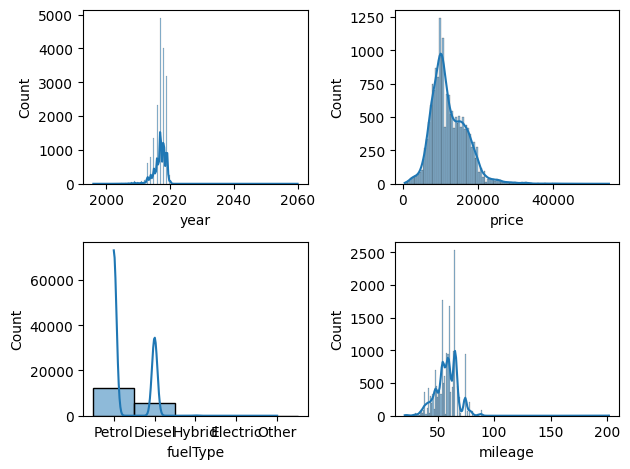

In [246]:
plotting("year",1)
plotting("price",2)
plotting("fuelType",3)
plotting("mileage",4)
plt.tight_layout()

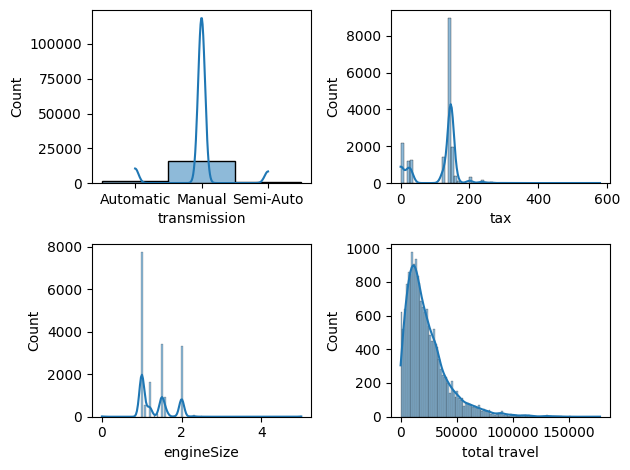

In [247]:
plotting('transmission',1)
plotting('tax',2)
plotting('engineSize',3)
plotting("total travel",4)
plt.tight_layout()

engine_group  tax    
Small         2004952    1
Medium        21065      1
Large         10060      1
Name: count, dtype: int64


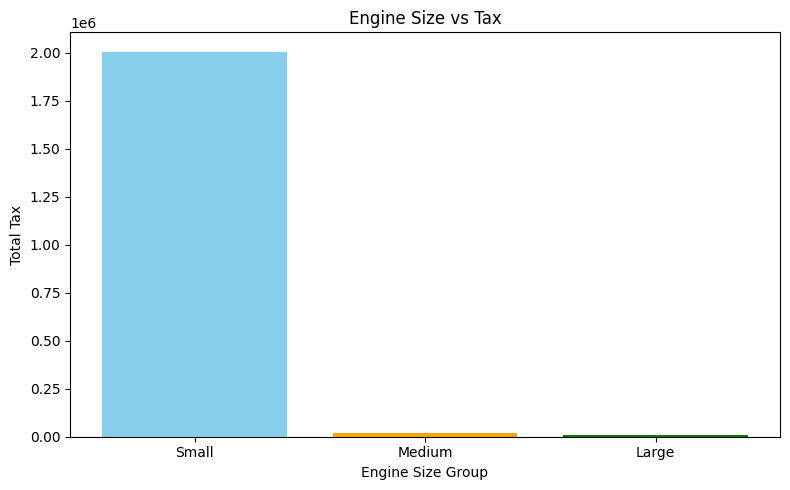

In [248]:

bins = [0, 2, 4, 5]
labels = ['Small', 'Medium', 'Large']
df['engine_group'] = pd.cut(df['engineSize'], bins=bins, labels=labels, include_lowest=True)


size_VS_Tax = df.groupby('engine_group')['tax'].sum().reset_index()
print(size_VS_Tax.value_counts())
# Plotting
plt.figure(figsize=(8, 5))
plt.bar(size_VS_Tax['engine_group'], size_VS_Tax['tax'], color=['skyblue', 'orange', 'green'])
plt.title("Engine Size vs Tax")
plt.xlabel("Engine Size Group")
plt.ylabel("Total Tax")
plt.tight_layout()
plt.show()


engine_group  price    
Small         216509710    1
Medium        2530862      1
Large         1573551      1
Name: count, dtype: int64


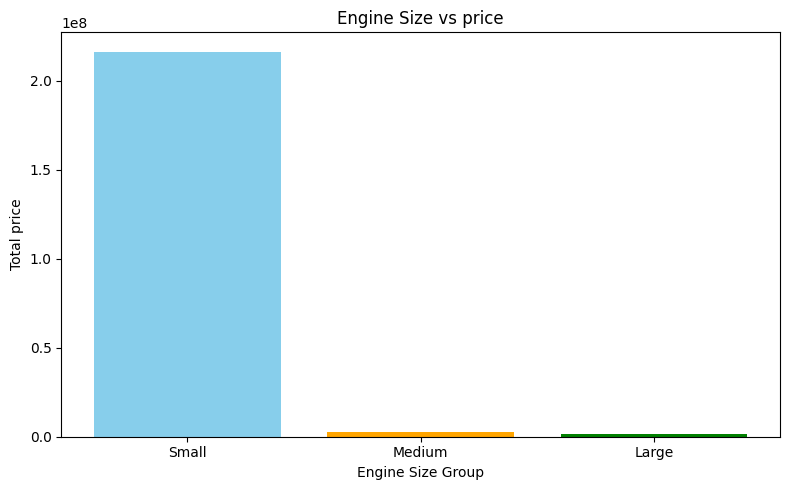

In [249]:
size_VS_price = df.groupby('engine_group')['price'].sum().reset_index()
print(size_VS_price.value_counts())
# Plotting
plt.figure(figsize=(8, 5))
plt.bar(size_VS_price['engine_group'], size_VS_price['price'], color=['skyblue', 'orange', 'green'])
plt.title("Engine Size vs price")
plt.xlabel("Engine Size Group")
plt.ylabel("Total price")
plt.tight_layout()
plt.show()


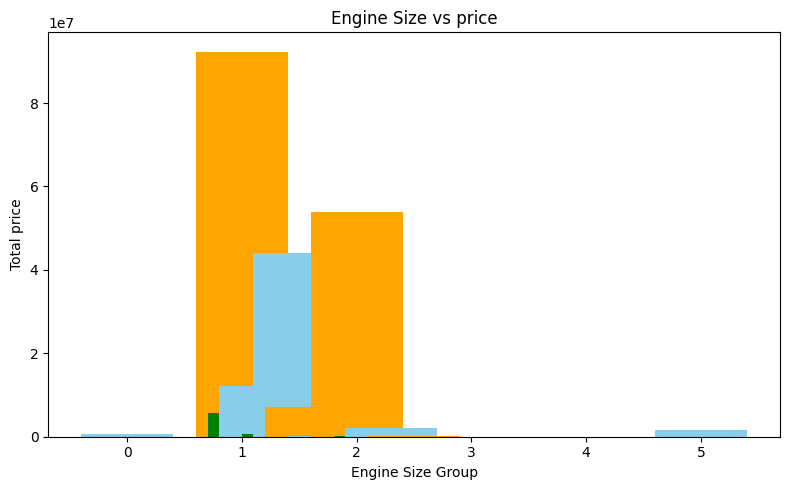

In [250]:
sizevs_price = df.groupby("engineSize")["price"].sum().reset_index()
plt.figure(figsize=(8,5))
plt.bar(sizevs_price["engineSize"],sizevs_price["price"], color=['skyblue', 'orange', 'green'])
plt.title("Engine Size vs price")
plt.xlabel("Engine Size Group")
plt.ylabel("Total price")
plt.tight_layout()
plt.show()


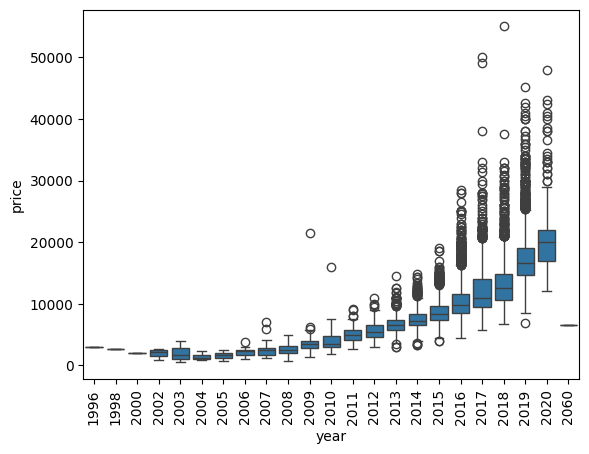

In [251]:
sns.boxplot(data= df , x = 'year',y ="price")
plt.xticks(rotation = 90)
plt.show()

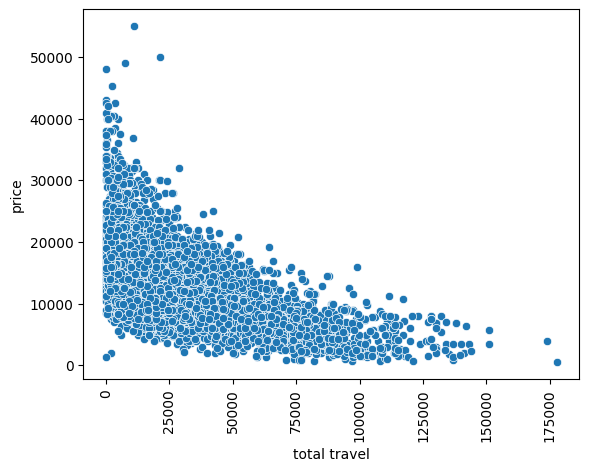

In [252]:
sns.scatterplot(data = df ,x = "total travel", y = "price")
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='mileage', ylabel='price'>

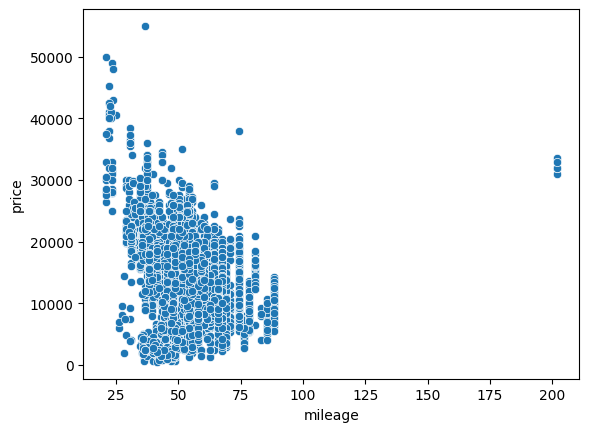

In [253]:
sns.scatterplot(data = df ,x = "mileage", y = "price")


<Axes: xlabel='transmission', ylabel='price'>

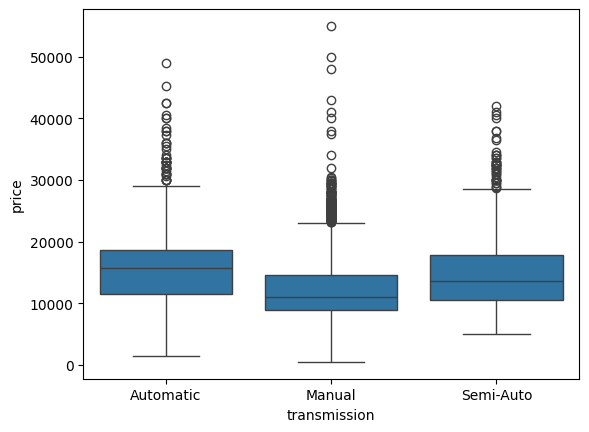

In [254]:
sns.boxplot(data = df,x = "transmission",y = "price")

In [255]:
X = df.drop(columns = ["price","engine_group"],axis = 1)
y = df["price"]

In [256]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'total travel', 'fuelType',
       'tax', 'mileage', 'engineSize', 'engine_group'],
      dtype='object')

In [257]:
#one hot encoding 
X_one_encoded = pd.get_dummies(X,columns =['model','transmission','fuelType'] )
X_one_encoded

,year,total travel,tax,mileage,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,model_ Transit Tourneo,model_Focus,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15944,150,57.7,1.0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1,2018,9083,150,57.7,1.0,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,2017,12456,150,57.7,1.0,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,2019,10460,145,40.3,1.5,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4,2019,1482,145,48.7,1.0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,16700,150,47.1,1.4,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
17962,2014,40700,30,57.7,1.0,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
17963,2015,7010,20,67.3,1.6,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
17964,2018,5007,145,57.7,1.2,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [258]:
from sklearn.preprocessing import LabelEncoder
Xlable = X.copy()  # make a safe copy
columns = ['model', 'transmission', 'fuelType']
label_encoders = {}
encode = LabelEncoder()
for col in columns:
    le = LabelEncoder()
    Xlable[col] = le.fit_transform(Xlable[col].astype(str))  # Convert to string in case of nulls
    label_encoders[col] = le

In [259]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['year', 'total travel', 'tax', 'mileage', 'engineSize']
scaler = StandardScaler()
X_one_encoded[numerical_cols] = scaler.fit_transform(X_one_encoded[numerical_cols])



In [260]:
Xlable[['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', "total travel",
       'engineSize']] = scaler.fit_transform(Xlable[['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'total travel',
       'engineSize']])



In [261]:
Xlable

,model,year,transmission,total travel,fuelType,tax,mileage,engineSize
0,-0.460699,0.065128,-2.670032,-0.380998,0.688777,0.591358,-0.020442,-0.811386
1,-0.211477,0.552866,0.041351,-0.733359,0.688777,0.591358,-0.020442,-0.811386
2,-0.211477,0.065128,0.041351,-0.560132,0.688777,0.591358,-0.020442,-0.811386
3,-0.460699,1.040605,0.041351,-0.662640,0.688777,0.510727,-1.738890,0.345070
4,-0.460699,1.040605,-2.670032,-1.123724,0.688777,0.510727,-0.909294,-0.811386
...,...,...,...,...,...,...,...,...
17961,-1.706810,0.065128,0.041351,-0.342172,0.688777,0.591358,-1.067312,0.113779
17962,-1.706810,-1.398088,0.041351,0.890398,0.688777,-1.343791,-0.020442,-0.811386
17963,-0.211477,-0.910349,0.041351,-0.839822,-1.454098,-1.505053,0.927668,0.576362
17964,1.034634,0.552866,0.041351,-0.942690,0.688777,0.510727,-0.020442,-0.348804


In [262]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X_one_encoded, y, test_size=0.33, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [264]:
y_pred = model.predict(X_test)
y_pred

array([ 6676.74792864,  9175.10363172,  9876.15109278, ...,
       19944.5783948 ,  5551.82314202, 10177.30406554], shape=(5929,))

In [266]:
r2 = r2_score(y_test,y_pred)
r2

0.8408137113174077

In [267]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
print("Adjusted R² Score:", adjusted_r2)

Adjusted R² Score: 0.8398138992852814
